# Plotting and Exploration

In [19]:
%run analysis.py

To plot, execute the following:
from matplotlib import pyplot as mplt
from pandas.tools.plotting import parallel_coordinates
from scipy import stats

import seaborn as sns
sns.set_palette('muted')
sns.set_style('ticks')
sns.set_context('notebook')


In [20]:
from matplotlib import pyplot as mplt
from scipy import stats

import seaborn as sns
sns.set_palette('muted')
sns.set_style('ticks')
sns.set_context('notebook')

In [21]:
combined_df = pd.read_csv(combined_f)
combined_df.head()

,boardID,algo,heur,size,expanded,branching,time,cost
0,1.txt,astar,disjointPDBHorizontal,3x3,1,3.00,4893,1
1,2.txt,astar,disjointPDBHorizontal,3x3,1,3.00,4814,1
2,3.txt,astar,disjointPDBHorizontal,3x3,2,2.19,4723,2
3,4.txt,astar,disjointPDBHorizontal,3x3,2,1.79,4770,2
4,5.txt,astar,disjointPDBHorizontal,3x3,0,1.00,3,0


---

*Plotting functions below.*

In [86]:
def dist_plots_vert(data, idx_attr, val_attr):
    val_ordering = data[idx_attr].value_counts().index
    g = sns.FacetGrid(data, row=idx_attr, row_order=val_ordering,
                      size=1.7, aspect=4)
    g.map(sns.distplot, val_attr, rug=True) #hist=False, rug=True
    
    return mplt.show()

def factor_plots_scatter(data, row_attr, col_attr, x_attr, y_attr, **kwargs):
    g_factor = sns.FacetGrid(data, row=row_attr, col=col_attr, margin_titles=True)
    g_factor.map(sns.regplot, x_attr, y_attr, color=".3", fit_reg=False, x_jitter=.1, **kwargs)
    
    for ax in g_factor.axes.flat:
        [i.set_alpha(.75) for i in ax.collections]
        [i.set_alpha(.75) for i in ax.lines]
    
    return mplt.show()

def factor_plots_scatter_c(data, row_attr, col_attr, x_attr, y_attr, c, **kwargs):
    g_factor = sns.FacetGrid(data, row=row_attr, col=col_attr, margin_titles=True)
    g_factor.map(sns.regplot, x_attr, y_attr, fit_reg=False, x_jitter=.1, scatter_kws={'c':data[c]}, **kwargs)
    
    for ax in g_factor.axes.flat:
        [i.set_alpha(.75) for i in ax.collections]
        [i.set_alpha(.75) for i in ax.lines]
    
    return mplt.show()

def plot_pair_grid(data, color_attr, title, **kwargs):
    
    g_pair = sns.PairGrid(data, hue=color_attr, vars=metrics)
    g_pair = g_pair.map_diag(mplt.hist)
    g_pair = g_pair.map_offdiag(mplt.scatter, **kwargs)
    g_pair.add_legend()
    
    for ax in g_pair.axes.flat:
        [i.set_alpha(.25) for i in ax.collections]
        [i.set_alpha(.25) for i in ax.lines]
        """#ax.set_title("Title",fontsize=50)
        ax.set_xlabel("X Label",fontsize=18)
        ax.set_ylabel("Y Label",fontsize=18)
        ax.tick_params(labelsize=5)"""
        
    mplt.subplots_adjust(top=0.9)
    g_pair.fig.suptitle(title)
    
        
    # 
    #g_pair.axes.set_title("Title",fontsize=50)
    #g_pair.set_xlabel("X Label",fontsize=30)
    #g_pair.set_ylabel("Y Label",fontsize=20)
    #g_pair.tick_params(labelsize=5)
    
    sns.despine()
    return mplt.show()

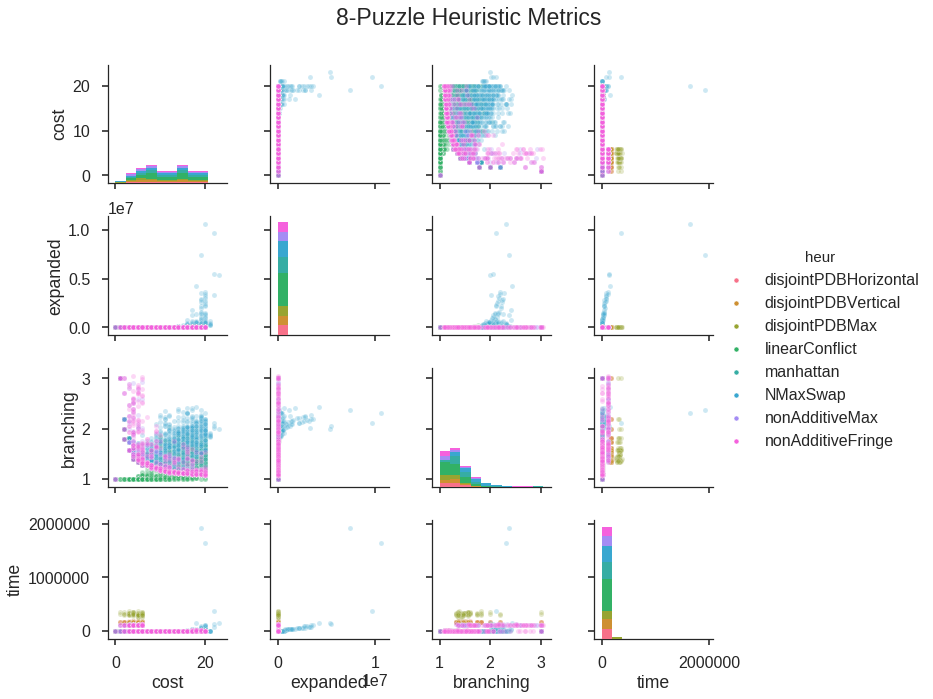

In [78]:
sns.set_context('poster')
plot_pair_grid(combined_df, 'heur', edgecolor="w", s=25)

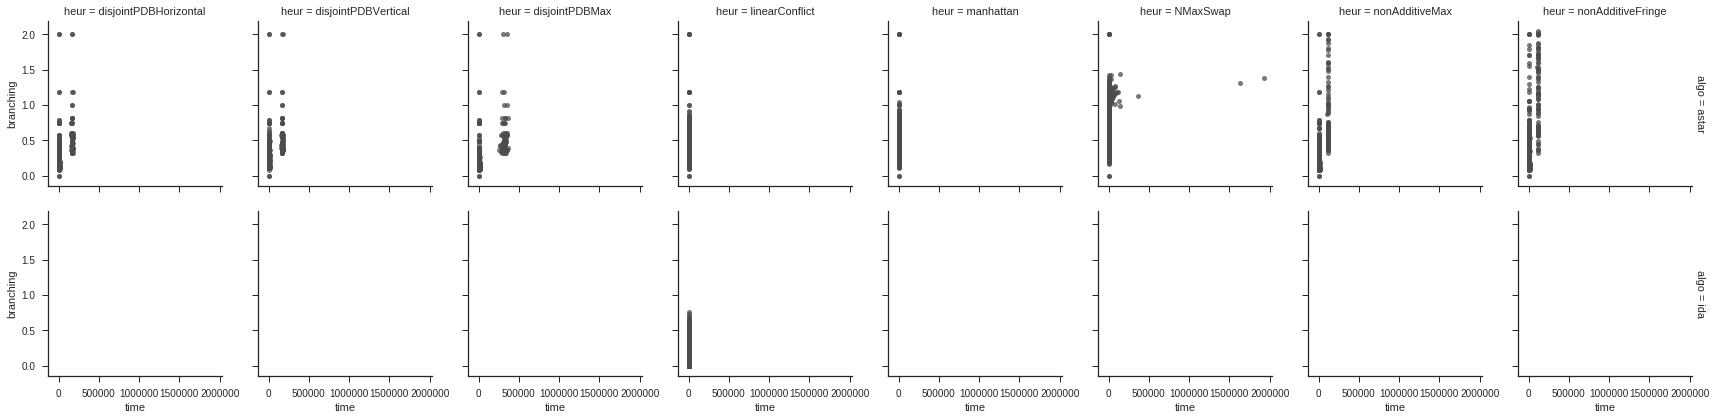

In [5]:
factor_plots_scatter(combined_df, 'algo', 'heur', 'time', 'branching', scatter_kws={"s": 25})

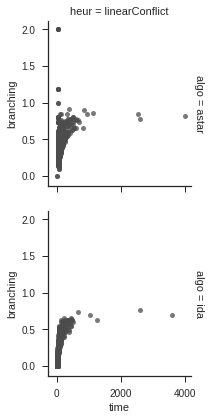

In [15]:
factor_plots_scatter(combined_df[combined_df.heur == 'linearConflict'], 'algo', 'heur', 'time', 'branching', scatter_kws={"s": 25})

#### Overviews

In [62]:
plot_pair_grid(combined_df, 'heur', edgecolor="w", s=25)

TypeError: 'AxesSubplot' object is not iterable

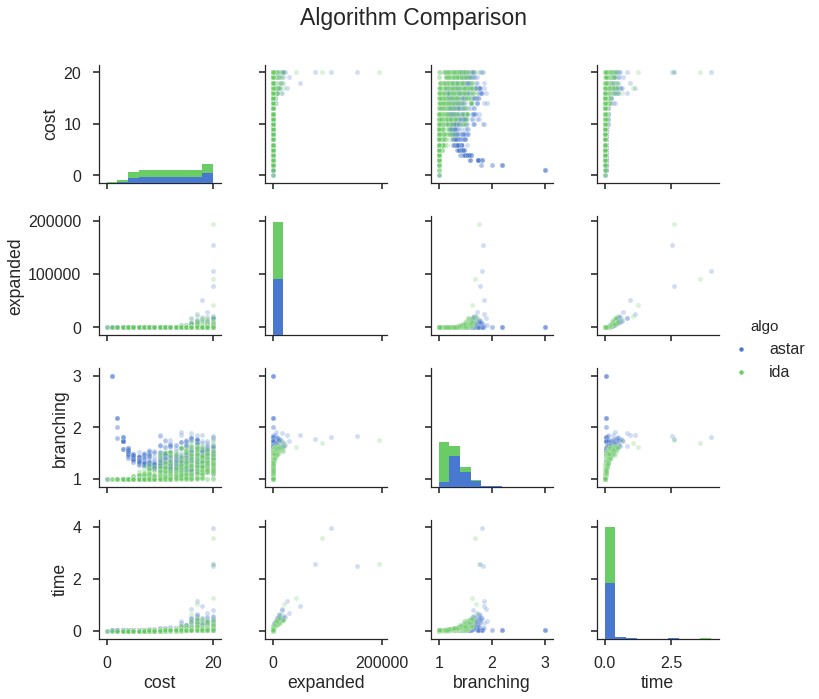

In [87]:
plot_pair_grid(algos_comp, 'algo', title='Algorithm Comparison', edgecolor="w", s=25)

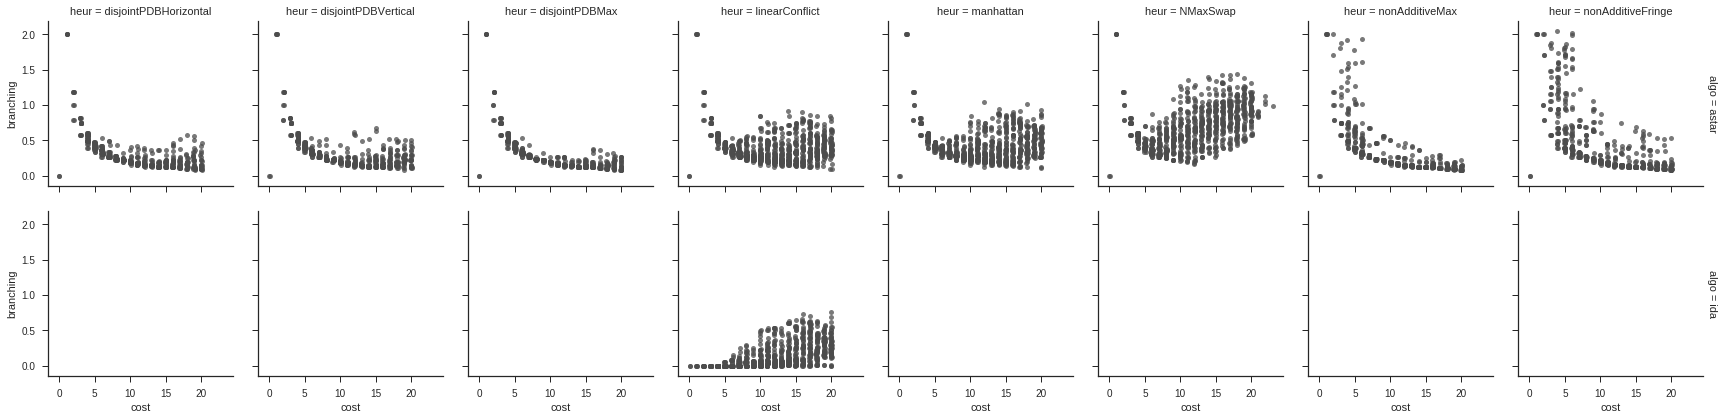

In [17]:
factor_plots_scatter(combined_df, 'algo', 'heur', 'cost', 'branching', scatter_kws={"s": 25})

original


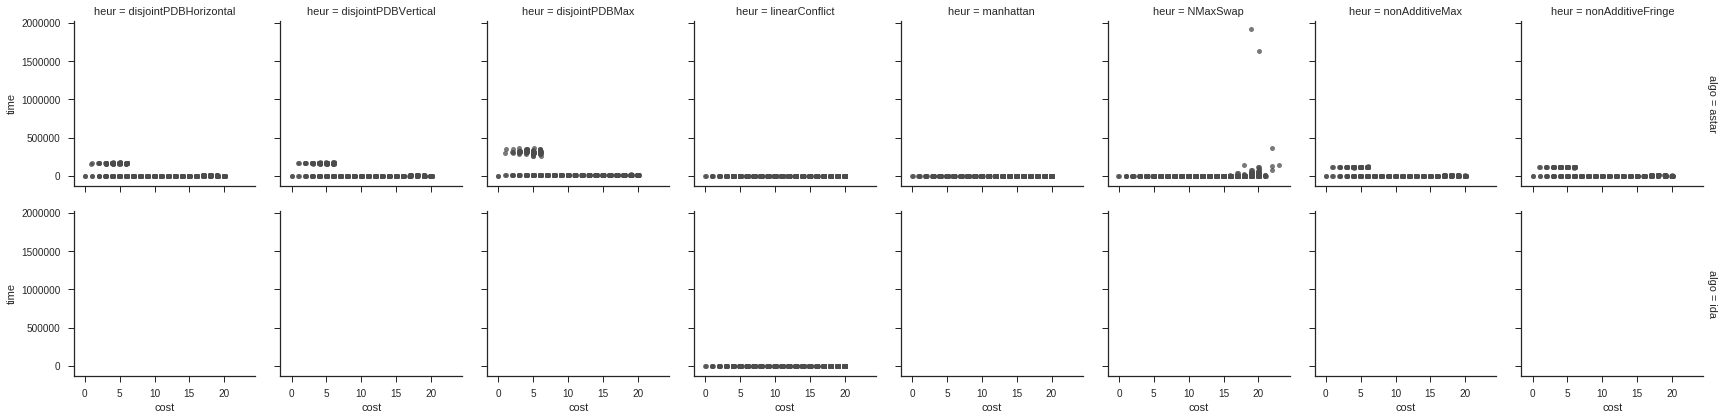

In [18]:
print ("original")
factor_plots_scatter(combined_df, 'algo', 'heur', 'cost', 'time', scatter_kws={"s": 25})

#print ("\nNMax filtered")
#factor_plots_scatter(filt_combined, 'algo', 'heur', 'cost', 'time', scatter_kws={"s": 25})

In [20]:
print ("original")
factor_plots_scatter(combined_df_df, 'algo', 'heur', 'cost', 'expanded', scatter_kws={"s": 25})

#print ("\nNMax filtered")
#factor_plots_scatter(filt_astar, 'algo', 'heur', 'cost', 'expanded', scatter_kws={"s": 25})

original


NameError: name 'combined_df_df' is not defined

cost


/home/user/.anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


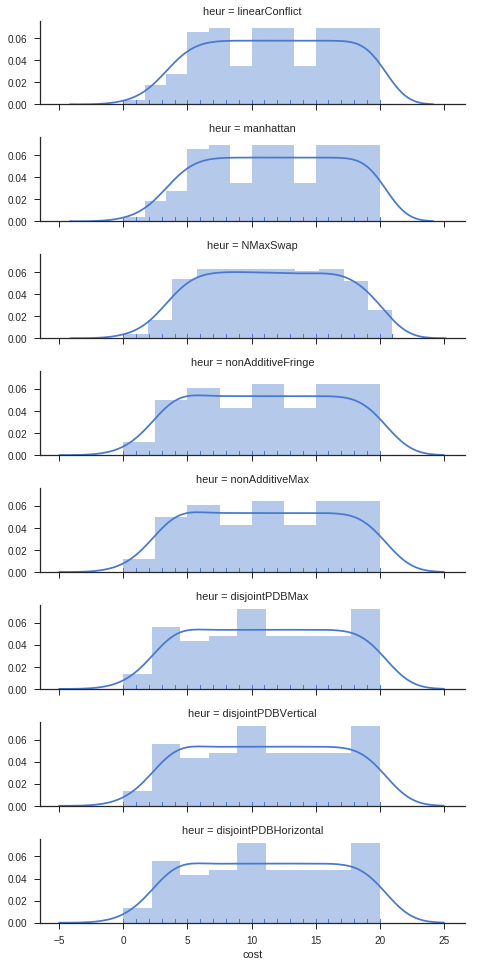

expanded


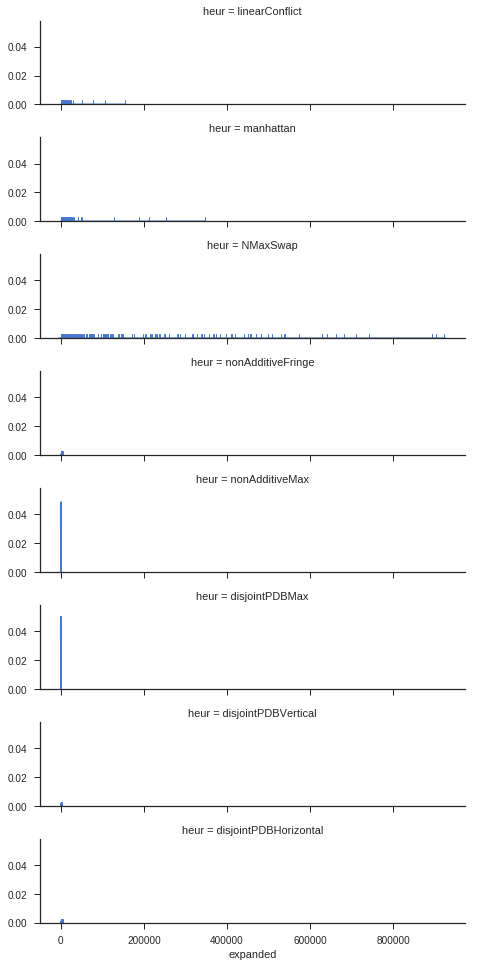

branching


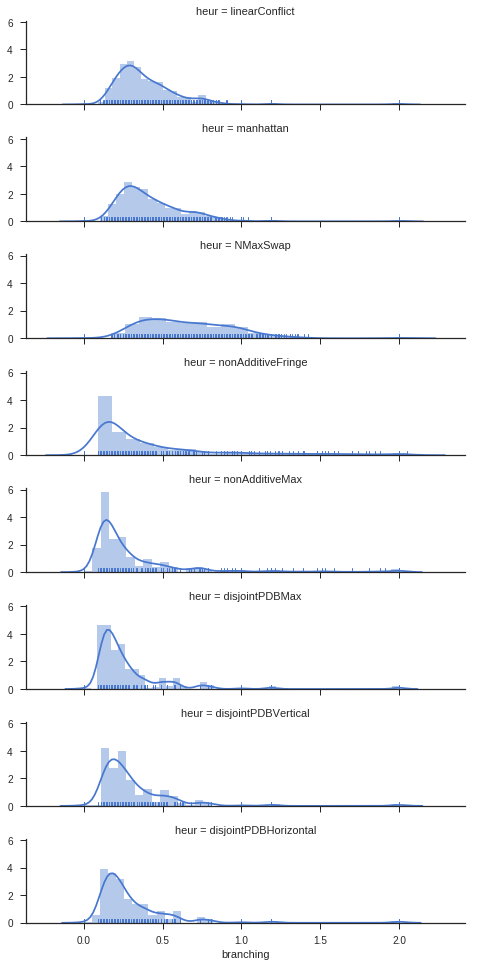

time


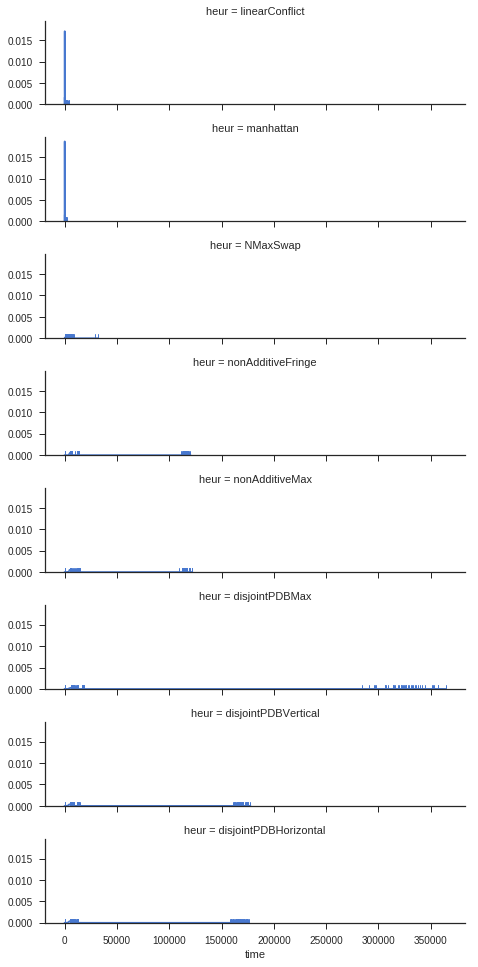

In [46]:
for metric in metrics:
    print (metric)
    dist_plots_vert(filt_combined, 'heur', metric)

In [10]:
results = combined_df
# assign groups
def group_cost(x):
    if (x < 8):
        return 'small'
    elif (x < 16):
        return 'medium'
    else:
        return 'large'
    
results['group'] = results['cost'].map(group_cost)

board_3 = results[(['size'] == '3x3') & (results['algo'] == 'IDA')]


---

crunching...

In [27]:
pd.set_option('precision', 3)

In [6]:
# assign families
def group_heur(x):
    if (x == ('manhattan' or 'linearConflict')):
        return 'Empty-Tile-Relaxed'
    elif (x == 'NMaxSwap'):
        return 'Adjacency-Relaxed'
    else:
        return 'Pattern Database'
    
combined_df['family'] = combined_df['heur'].map(group_heur)

In [7]:
combined_df.head()

,boardID,algo,heur,size,expanded,branching,time,cost,family
0,1.txt,astar,disjointPDBHorizontal,3x3,1,3.00,4893,1,Pattern Database
1,2.txt,astar,disjointPDBHorizontal,3x3,1,3.00,4814,1,Pattern Database
2,3.txt,astar,disjointPDBHorizontal,3x3,2,2.19,4723,2,Pattern Database
3,4.txt,astar,disjointPDBHorizontal,3x3,2,1.79,4770,2,Pattern Database
4,5.txt,astar,disjointPDBHorizontal,3x3,0,1.00,3,0,Pattern Database


In [24]:
board_3 = combined_df[combined_df['size'] == '3x3']
board_3.time = board_3.time / 1000

/home/user/.anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [25]:
puzzle_8_table = board_3[['expanded', 'branching', 'time', 'heur']].groupby(['heur']).agg(['median', 'mean', 'std'])
#puzzle_8_table.columns = ['Nodes Expanded', 'Effective Branching Factor', 'Time (s)', 'Cost (# moves)'] * 3
#puzzle_8_table.columns.get_level_values(0)

puzzle_8_table.style.highlight_min(axis=0)

In [26]:
puzzle_8_table.to_csv('8-puzzle-metrics.csv')

In [27]:
# now the 4x4 table
board_4 = combined_df[combined_df['size'] == '4x4']
board_4.time = board_4.time / 1000
puzzle_15_table = board_3[['expanded', 'branching', 'time', 'heur']].groupby(['heur']).agg(['median', 'mean', 'std'])
puzzle_15_table.to_csv('15-puzzle-metrics.csv')

/home/user/.anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


---

Algorithm comparison

In [40]:
algos_comp = pd.read_csv((canonical_dir + 'parcords-linear.csv'))
algos_comp['time'] = algos_comp.time / 1000
algos_comp.head()

,boardID,algo,heur,size,expanded,branching,time,cost
0,1.txt,astar,linearConflict,3x3,1,3.00,0.037,1
1,2.txt,astar,linearConflict,3x3,1,3.00,0.039,1
2,3.txt,astar,linearConflict,3x3,2,2.19,0.039,2
3,4.txt,astar,linearConflict,3x3,2,1.79,0.036,2
4,5.txt,astar,linearConflict,3x3,0,1.00,0.003,0


In [85]:
algo_comp_table = algos_comp[['expanded', 'branching', 'time', 'algo', 'size']].groupby(['size', 'algo']).agg(['median', 'mean', 'std'])
algo_comp_table.to_latex('algo-compare-metrics.tex')

algo_comp_table.style.highlight_min(axis=0)

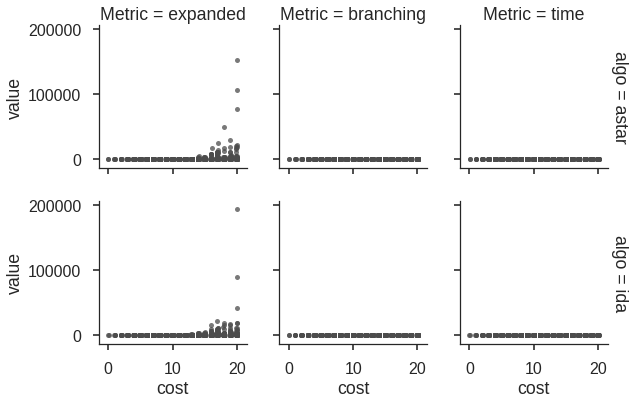

In [81]:
melted_algos = pd.melt(algos_comp, id_vars=['boardID', 'size', 'heur', 'algo', 'cost'], value_vars=['expanded', 'branching', 'time'], var_name='Metric')
factor_plots_scatter(melted_algos, 'algo', 'Metric', 'cost', 'value', scatter_kws={"s": 25})

In [80]:
melted_algos.head()

,boardID,size,heur,algo,cost,Metric,value
0,1.txt,3x3,linearConflict,astar,1,expanded,1.0
1,2.txt,3x3,linearConflict,astar,1,expanded,1.0
2,3.txt,3x3,linearConflict,astar,2,expanded,2.0
3,4.txt,3x3,linearConflict,astar,2,expanded,2.0
4,5.txt,3x3,linearConflict,astar,0,expanded,0.0


In [ ]:
factor_plots_scatter(combined_df, 'algo', 'heur', 'cost', 'branching', scatter_kws={"s": 25})

---

Plots, factor grid of the heuristic families.

In [52]:
melted_3 = pd.melt(board_3, id_vars=['boardID', 'size', 'heur', 'family', 'cost'], value_vars=['expanded', 'branching', 'time'], var_name='Metric')

,boardID,size,heur,family,cost,Metric,value
0,1.txt,3x3,disjointPDBHorizontal,Pattern Database,1,expanded,1.000
1,2.txt,3x3,disjointPDBHorizontal,Pattern Database,1,expanded,1.000
2,3.txt,3x3,disjointPDBHorizontal,Pattern Database,2,expanded,2.000
3,4.txt,3x3,disjointPDBHorizontal,Pattern Database,2,expanded,2.000
4,5.txt,3x3,disjointPDBHorizontal,Pattern Database,0,expanded,0.000
5,6.txt,3x3,disjointPDBHorizontal,Pattern Database,2,expanded,2.000
6,7.txt,3x3,disjointPDBHorizontal,Pattern Database,2,expanded,2.000
7,10.txt,3x3,disjointPDBHorizontal,Pattern Database,3,expanded,3.000
8,11.txt,3x3,disjointPDBHorizontal,Pattern Database,3,expanded,3.000
9,12.txt,3x3,disjointPDBHorizontal,Pattern Database,3,expanded,3.000


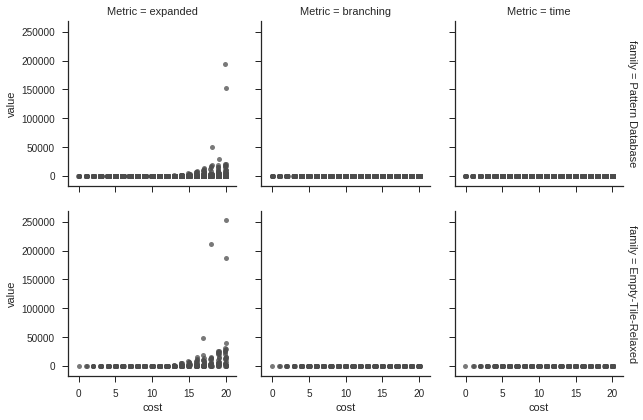

In [59]:
#def factor_plots_scatter_c(data, row_attr, col_attr, x_attr, y_attr, c, **kwargs):
factor_plots_scatter(melted_3[melted_3['heur'] != 'NMaxSwap'], 'family', 'Metric', 'cost', 'value', scatter_kws={"s": 25})


In [90]:
combined_df['time'] = combined_df.time / 1000

In [91]:
combined_df[combined_df.time >= 600]

,boardID,algo,heur,size,expanded,branching,time,cost,family
4544,54789.txt,astar,NMaxSwap,3x3,10600732,2.31,1636.056,20,Adjacency-Relaxed
4961,999989.txt,astar,NMaxSwap,4x4,7430808,2.38,1924.879,19,Adjacency-Relaxed


In [92]:
1636 / 60

27.266666666666666

In [10]:
num_trials = combined_df[['size', 'cost', 'boardID']].groupby(['size', 'cost']).count().reset_index()
num_trials.rename(columns={'boardID':'Count'}, inplace=True)

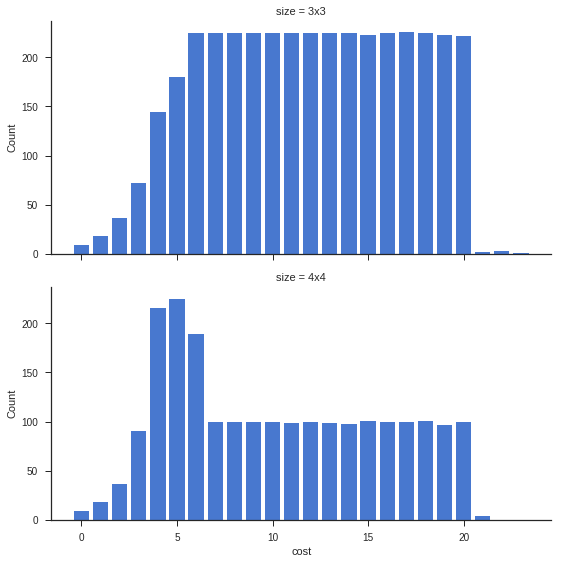

In [17]:
# cost
cost_g = sns.FacetGrid(num_trials, row='size', size=4, aspect=2)
cost_g.map(mplt.bar, 'cost', 'Count')
sns.despine()
mplt.show()